In [1]:
import os
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy
import pandas as pd
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_curve, auc

In [2]:
tb = pd.read_csv('./results/all_features.csv')
tb

,1D Gray Entropy,2D Gray Entropy,1D Hue Entropy,Color Richness,Relative Area,Horizontal Interval Metric,Vertical Interval Metric,Dominant Color X,Dominant Color Y,Dominant Color Z,label
0,3.757319,8.199638,2.984306,4.0,0.180172,0.000000,0.006129,-0.022779,-0.031353,0.823529,1
1,4.714888,9.984443,4.135668,3.0,0.983521,0.001712,0.003144,-0.045593,-0.102404,0.772549,1
2,5.070659,10.304571,4.157235,4.0,0.995805,0.002059,0.004746,-0.014302,0.204529,0.396078,1
3,4.861554,9.968199,4.632747,4.0,0.995803,0.001441,0.002214,-0.034903,-0.078394,0.235294,1
4,4.831612,9.891949,4.300436,2.0,0.976716,0.001335,0.003850,-0.122485,0.230361,0.458824,1
...,...,...,...,...,...,...,...,...,...,...,...
530,4.472156,9.025126,3.321349,7.0,0.891165,0.000029,0.000040,-0.015255,-0.046950,0.839216,0
531,4.658013,8.932943,3.891208,3.0,0.931654,0.000442,0.000485,-0.009792,-0.034149,0.823529,0
532,4.726424,8.967950,4.560189,7.0,0.973873,0.003282,0.004204,0.058039,0.000000,0.870588,0
533,4.792121,9.414940,4.616940,5.0,0.973879,0.000788,0.001320,-0.032092,0.028895,0.211765,0


In [3]:
valid_tb = pd.read_csv('./results/valid_all_features.csv')
valid_tb

,1D Gray Entropy,2D Gray Entropy,1D Hue Entropy,Color Richness,Relative Area,Horizontal Interval Metric,Vertical Interval Metric,Dominant Color X,Dominant Color Y,Dominant Color Z,label
0,1.057765,2.355009,2.984306,4.0,0.603691,0.002855,0.004579,-0.000000,0.000000,0.996078,1
1,3.190651,6.889010,4.135668,10.0,0.960619,0.001777,0.002574,0.000000,0.000000,0.988235,1
2,2.765383,6.024832,4.157235,7.0,0.938517,0.002572,0.002980,0.006573,0.004107,0.988235,1
3,2.217748,5.533011,4.632747,5.0,0.695489,0.001402,0.001468,-0.000000,0.000000,0.988235,1
4,2.423091,5.948474,4.300436,7.0,0.745724,0.001381,0.001389,0.002386,0.003054,0.988235,1
5,2.209020,5.404380,4.017312,5.0,0.851555,0.000883,0.001061,0.000000,0.000000,0.992157,1
6,2.673678,6.044106,2.846033,7.0,0.647294,0.002477,0.002281,0.012357,0.014726,0.980392,1
7,2.744171,6.551896,2.198130,4.0,0.901267,0.000720,0.001217,0.002386,0.003054,0.988235,1
8,2.273922,5.194957,3.323777,3.0,0.899065,0.002807,0.003555,0.002603,0.002891,0.992157,1
9,2.263381,5.180726,2.272553,4.0,0.899065,0.002778,0.003407,0.002603,0.002891,0.992157,1


In [23]:
accuracy = []
precision = []
recall = []
F1 = []
AUC = []

kf = KFold(n_splits=5, shuffle=True, random_state=19260817)
for train_index, test_index in kf.split(tb):
    train_X = tb.iloc[:,:-1].iloc[train_index]
    test_X = tb.iloc[:,:-1].iloc[test_index]
    train_y = tb.iloc[:,-1][train_index]
    test_y = tb.iloc[:,-1][test_index]

    clf = tree.DecisionTreeClassifier(max_depth=2)
    clf.fit(train_X, train_y)
    test_pred = clf.predict(test_X)
    test_prob = clf.predict_proba(test_X)
    fpr,tpr,thresh=roc_curve(test_y,test_pred, pos_label=1)
    
    
    accuracy.append(accuracy_score(test_y, test_pred))
    precision.append(precision_score(test_y, test_pred))
    recall.append(recall_score(test_y, test_pred))
    F1.append(f1_score(test_y, test_pred))
    AUC.append(auc(fpr,tpr))
print(np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(F1), np.mean(AUC))
print(np.std(accuracy), np.std(precision), np.std(recall), np.std(F1), np.std(AUC))

0.8971962616822429 0.8978645420463325 0.9625757695377949 0.9288377945371421 0.8544077534060076
0.019603903704114984 0.024097884099336248 0.017141684517447183 0.014758999440673918 0.0217208202446059


In [22]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(tb.iloc[:,:-1],tb.iloc[:,-1])
valid_pred = clf.predict(valid_tb.iloc[:,:-1])

print(accuracy_score(valid_tb.iloc[:,-1],valid_pred), precision_score(valid_tb.iloc[:,-1], valid_pred), recall_score(valid_tb.iloc[:,-1], valid_pred), f1_score(valid_tb.iloc[:,-1], valid_pred))

0.7058823529411765 0.7058823529411765 1.0 0.8275862068965517


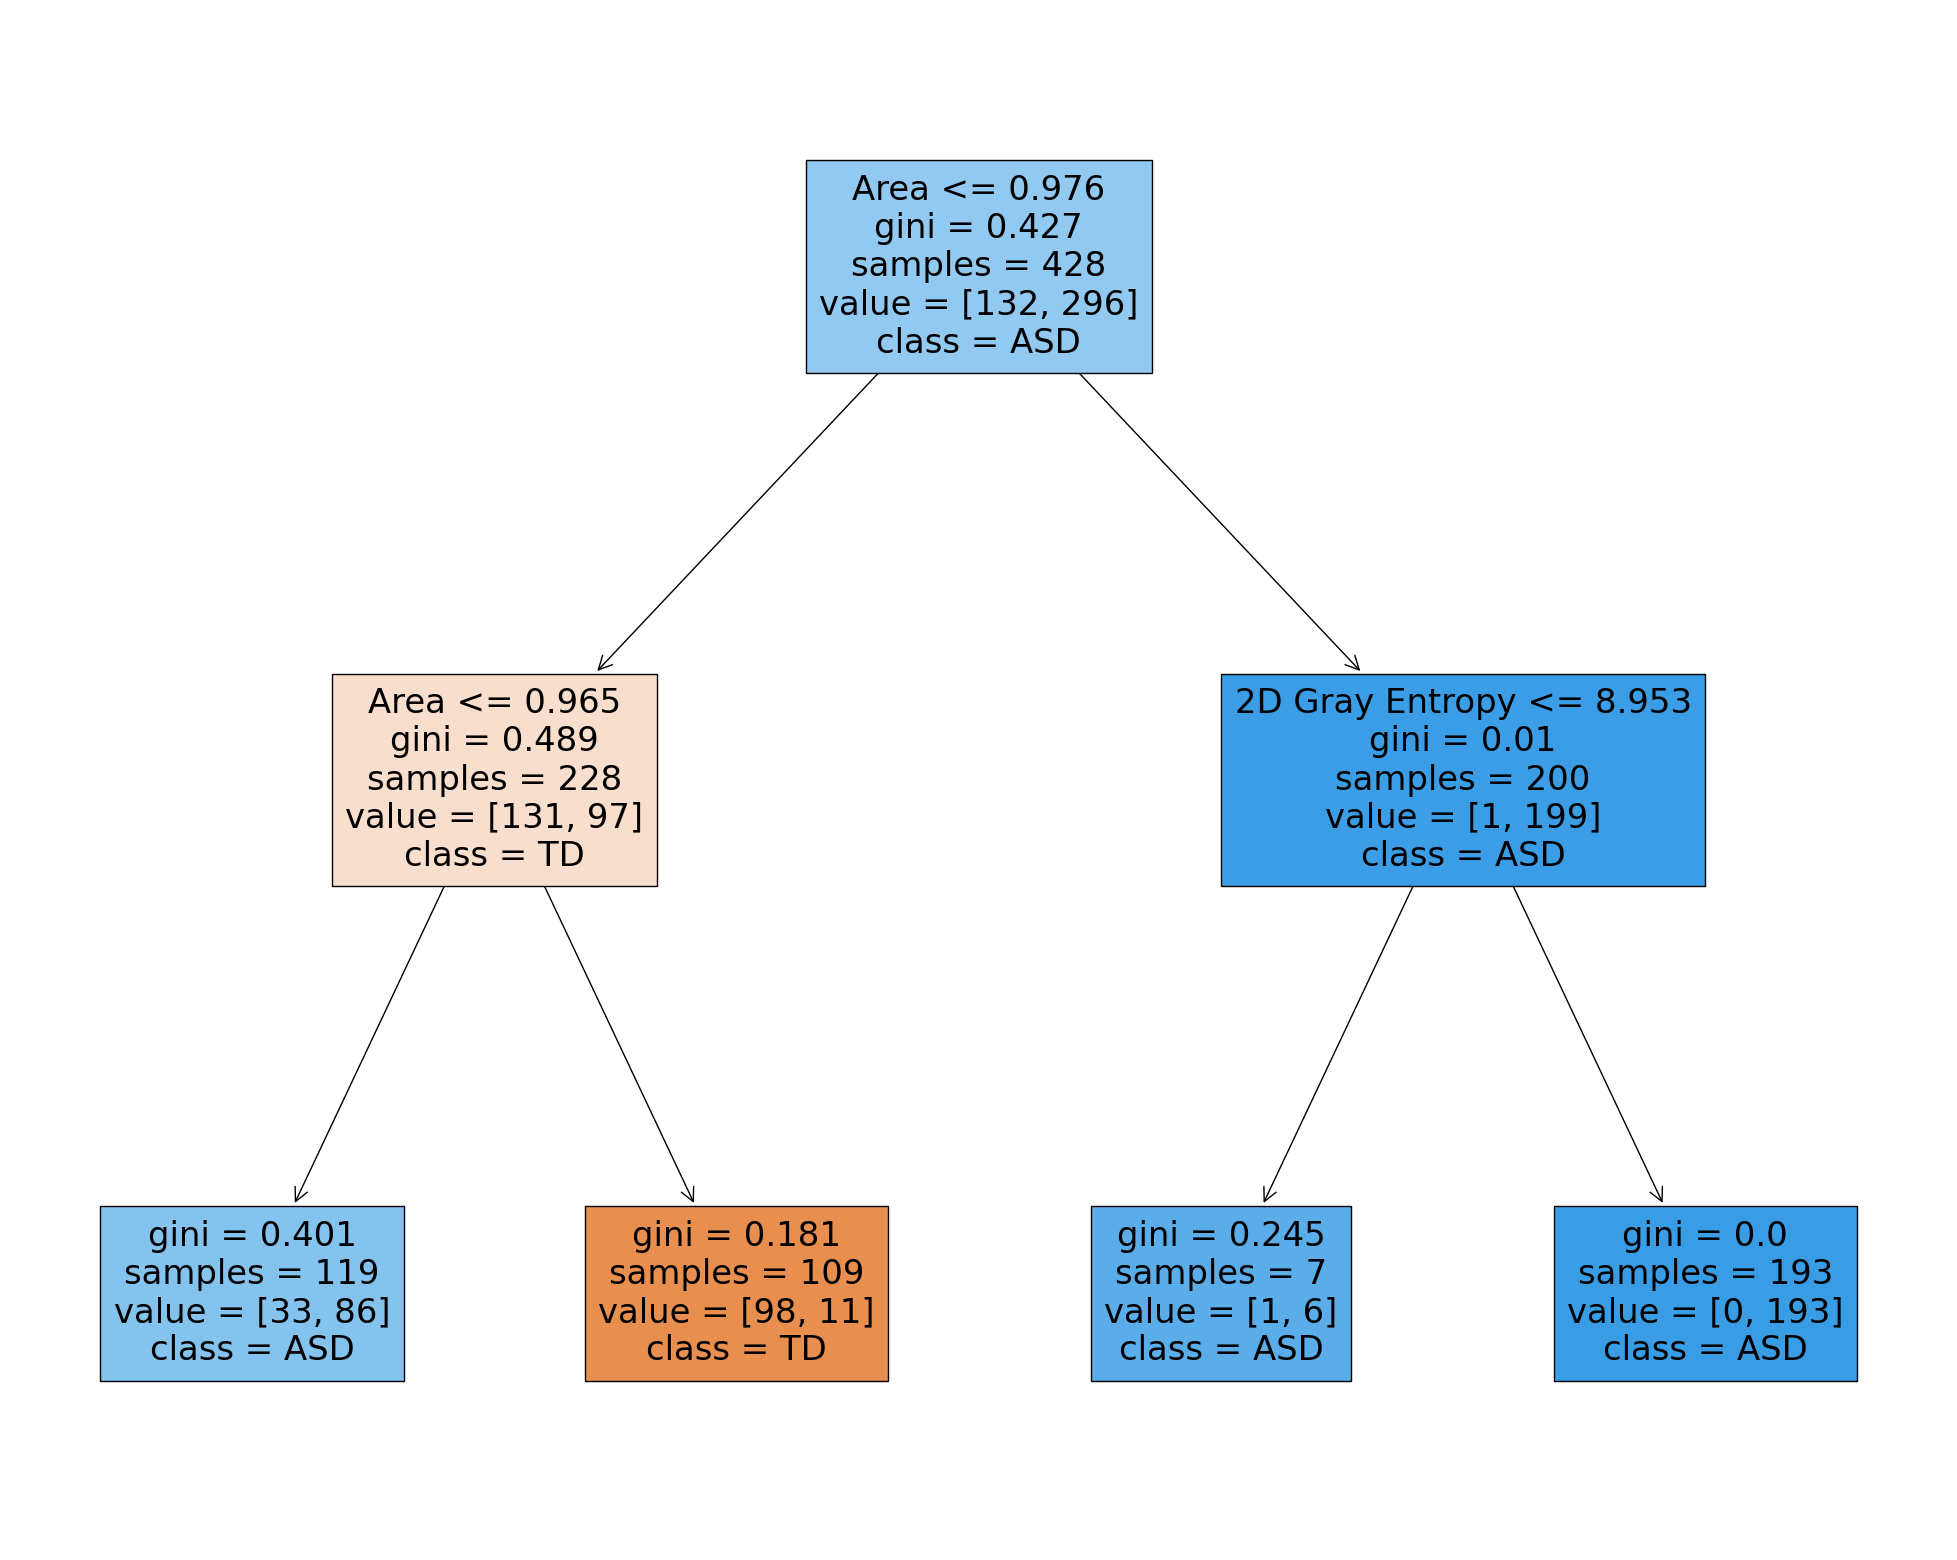

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    clf, 
    feature_names=valid_tb.columns,  
    class_names=['TD', 'ASD'],
    filled=True
)

In [33]:
accuracy = []
precision = []
recall = []
F1 = []
AUC = []

kf = KFold(n_splits=5, shuffle=True, random_state=19260817)
for train_index, test_index in kf.split(tb):
    train_X = tb.iloc[:,:-1].iloc[train_index]
    test_X = tb.iloc[:,:-1].iloc[test_index]
    train_y = tb.iloc[:,-1][train_index]
    test_y = tb.iloc[:,-1][test_index]

    clf = LogisticRegression(max_iter=1000)
    clf.fit(train_X, train_y)
    test_pred = clf.predict(test_X)
    test_prob = clf.predict_proba(test_X)
    fpr,tpr,thresh=roc_curve(test_y,test_pred, pos_label=1)
    
    
    accuracy.append(accuracy_score(test_y, test_pred))
    precision.append(precision_score(test_y, test_pred))
    recall.append(recall_score(test_y, test_pred))
    F1.append(f1_score(test_y, test_pred))
    AUC.append(auc(fpr,tpr))
print(np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(F1), np.mean(AUC))
print(np.std(accuracy), np.std(precision), np.std(recall), np.std(F1), np.std(AUC))

0.8654205607476635 0.8835451413633203 0.9307307794649567 0.9064446309663701 0.8202616429045936
0.017333866346720943 0.01452073071930237 0.014739541926594248 0.011870216375569304 0.026680505983654623


In [34]:
clf = LogisticRegression(max_iter=1000)
clf.fit(tb.iloc[:,:-1],tb.iloc[:,-1])
valid_pred = clf.predict(valid_tb.iloc[:,:-1])

print(accuracy_score(valid_tb.iloc[:,-1],valid_pred), precision_score(valid_tb.iloc[:,-1], valid_pred), recall_score(valid_tb.iloc[:,-1], valid_pred), f1_score(valid_tb.iloc[:,-1], valid_pred))

0.3235294117647059 1.0 0.041666666666666664 0.07999999999999999


In [41]:
accuracy = []
precision = []
recall = []
F1 = []
AUC = []

kf = KFold(n_splits=5, shuffle=True, random_state=19260817)
for train_index, test_index in kf.split(tb):
    train_X = tb.iloc[:,:-1].iloc[train_index]
    test_X = tb.iloc[:,:-1].iloc[test_index]
    train_y = tb.iloc[:,-1][train_index]
    test_y = tb.iloc[:,-1][test_index]

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(train_X, train_y)
    test_pred = clf.predict(test_X)
    test_prob = clf.predict_proba(test_X)
    fpr,tpr,thresh=roc_curve(test_y,test_pred, pos_label=1)
    
    
    accuracy.append(accuracy_score(test_y, test_pred))
    precision.append(precision_score(test_y, test_pred))
    recall.append(recall_score(test_y, test_pred))
    F1.append(f1_score(test_y, test_pred))
    AUC.append(auc(fpr,tpr))
print(np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(F1), np.mean(AUC))
print(np.std(accuracy), np.std(precision), np.std(recall), np.std(F1), np.std(AUC))

0.8242990654205608 0.838700198772794 0.9284012590974615 0.8807889440858233 0.7537953451779291
0.013735456501587915 0.01277732466485387 0.032717819141350246 0.011063149871300968 0.01928648033208418


In [42]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(tb.iloc[:,:-1],tb.iloc[:,-1])
valid_pred = clf.predict(valid_tb.iloc[:,:-1])

print(accuracy_score(valid_tb.iloc[:,-1],valid_pred), precision_score(valid_tb.iloc[:,-1], valid_pred), recall_score(valid_tb.iloc[:,-1], valid_pred), f1_score(valid_tb.iloc[:,-1], valid_pred))

0.47058823529411764 1.0 0.25 0.4


In [52]:
accuracy = []
precision = []
recall = []
F1 = []
AUC = []

kf = KFold(n_splits=5, shuffle=True, random_state=19260817)
for train_index, test_index in kf.split(tb):
    train_X = tb.iloc[:,:-1].iloc[train_index]
    test_X = tb.iloc[:,:-1].iloc[test_index]
    train_y = tb.iloc[:,-1][train_index]
    test_y = tb.iloc[:,-1][test_index]

    clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(20, 10), random_state=19260817, max_iter=1000)
    clf.fit(train_X, train_y)
    test_pred = clf.predict(test_X)
    test_prob = clf.predict_proba(test_X)
    fpr,tpr,thresh=roc_curve(test_y,test_pred, pos_label=1)
    
    accuracy.append(accuracy_score(test_y, test_pred))
    precision.append(precision_score(test_y, test_pred))
    recall.append(recall_score(test_y, test_pred))
    F1.append(f1_score(test_y, test_pred))
    AUC.append(auc(fpr,tpr))
print(np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(F1), np.mean(AUC))
print(np.std(accuracy), np.std(precision), np.std(recall), np.std(F1), np.std(AUC))

0.8299065420560747 0.8490788772287153 0.9190537177878951 0.8824721323777733 0.7668339196492842
0.03803175691472113 0.017680338391170725 0.044703222178788214 0.02967351669658936 0.03835446005928116


In [4]:
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(30,20,10), activation='relu', random_state=19260817, max_iter=10000)
clf.fit(tb.iloc[:,:-1],tb.iloc[:,-1])
valid_pred = clf.predict(valid_tb.iloc[:,:-1])

print(accuracy_score(valid_tb.iloc[:,-1],valid_pred), precision_score(valid_tb.iloc[:,-1], valid_pred), recall_score(valid_tb.iloc[:,-1], valid_pred), f1_score(valid_tb.iloc[:,-1], valid_pred))

0.3235294117647059 1.0 0.041666666666666664 0.07999999999999999
